In [14]:
import os
import random

import matplotlib.pyplot as plt
import pandas as pd
import torch

from src.data.loss_dataset import LossDataset
import numpy as np

In [15]:
def get_loss_dataset(dataset_path: str) -> pd.DataFrame:
    dataset = LossDataset(dataset_path)
    dataset.load()

    df = dataset.df
    return df


def get_indices_from_probe_suite(suite: list) -> list[int]:
    return [idx for _, idx in suite]

In [16]:
dataset_name = "cifar10"

probe_suite = torch.load(f"../../data/processed/{dataset_name}/train_probe_suite.pt")
df = get_loss_dataset("../../models/losses/cifar10-1x-gpua100-20230315_1633")
df["epoch"] = df["epoch"].astype(int)

suite_names = {
    "typical": "Typical",
    "atypical": "Atypical",
    "random_outputs": "Random outputs",
    # "random_inputs_outputs": "Random inputs and outputs",
    "corrupted": "Corrupted",
}

random_outputs = probe_suite.random_outputs
random_outputs_indices = [idx for _, idx in random_outputs]
df2 = df[df['sample_index'].isin(random_outputs_indices)]
df2.head()

,batch_idx,loss,sample_index,y,y_hat,epoch
18,0,2.232422,19561,1,7,0
84,1,2.115234,39634,4,7,0
107,1,2.904297,25603,3,7,0
169,2,0.984863,36446,7,7,0
189,2,1.358398,33427,7,7,0


In [17]:
preds = []
epochs = sorted(df2['epoch'].unique())

for epoch in epochs:
    temp = df2.groupby("epoch").get_group(epoch)

# Make new column with True if y == y_hat
    temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
    preds.append(temp['pred'].mean())

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

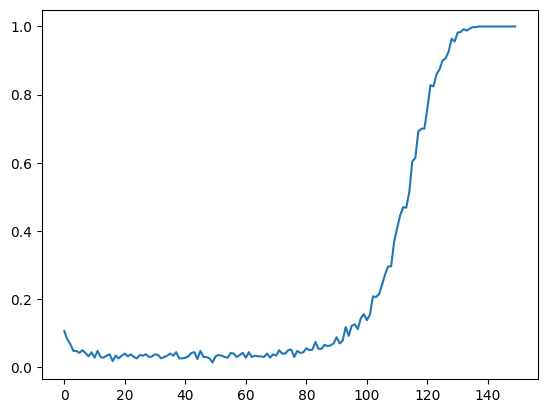

In [18]:
plt.plot(epochs, preds)
plt.show()

In [19]:

#epochs = sorted(df2['epoch'].unique())

temp = df2.groupby("epoch").get_group(20)

# Make new column with True if y == y_hat
temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
temp['pred'].mean()
temp

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2726312417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)


,batch_idx,loss,sample_index,y,y_hat,epoch,pred
3150024,0,6.550781,47101,8,1,20,0
3150422,6,3.917969,37191,9,0,20,0
3150432,6,5.808594,6395,5,6,20,0
3150449,7,8.226562,15541,4,0,20,0
3150835,13,5.312500,49898,2,4,20,0
...,...,...,...,...,...,...,...
3199225,769,5.878906,37584,0,3,20,0
3199300,770,11.546875,7201,8,7,20,0
3199469,772,5.609375,35357,8,9,20,0
3199690,776,5.281250,9530,9,6,20,0


ship


Text(0.5, 1.0, 'Random Output w. label ship')

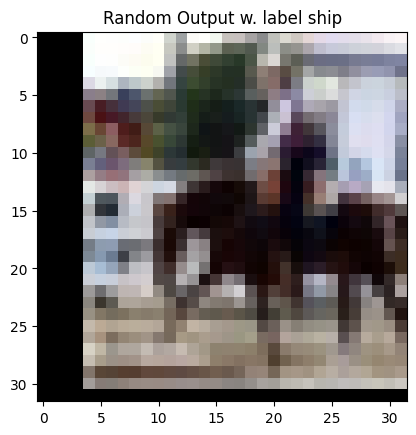

In [20]:
# plot some images
from src.data.idx_to_label_names import get_idx_to_label_names

idx_to_label = get_idx_to_label_names(dataset_name)

testid = 7201
# Plot the image
plt.imshow(probe_suite[testid][0][0].permute(1,2,0))
# Title
label = idx_to_label[probe_suite[testid][0][1]]
print(label)
plt.title(f"Random Output w. label {label}")


    

In [21]:
probe_suite[testid][0][1]


8

In [25]:
train = torch.load("../../data/processed/cifar10/train.pt")
# get correct labels from random outputs
correct_labels = [train[idx][1] for idx in random_outputs_indices]
# get incorrect labels from random outputs
random_labels = [probe_suite[idx][0][1] for idx in random_outputs_indices]

print(correct_labels[:10])
print(random_labels[:10])

[6, 5, 7, 9, 7, 6, 3, 7, 0, 5]
[4, 0, 9, 6, 5, 7, 5, 9, 3, 1]


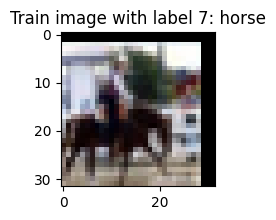

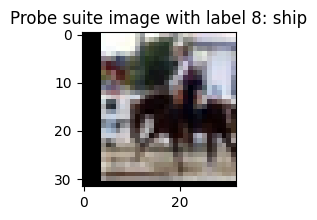

In [38]:
first_idx = 7201

# plot from train and probe suite
plt.figure(figsize=(2,2))
plt.imshow(train[first_idx][0].permute(1,2,0))
plt.title(f"Train image with label {train[first_idx][1]}: {idx_to_label[train[first_idx][1]]}")
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(probe_suite[first_idx][0][0].permute(1,2,0))
plt.title(f"Probe suite image with label {probe_suite[first_idx][0][1]}: {idx_to_label[probe_suite[first_idx][0][1]]}")
plt.show()